Quick look at one of the datasets, and simple ARIMA model

In [1]:
from fastai.structured import *
from fastai.column_data import *

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
PATH='../input/merged_data/'

In [4]:
hh_combined = pd.read_feather('../input/merged_data/halfhourly_combined_bank.feather')

In [5]:
hh_combined.head()

,Unnamed: 0_x,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,LCL_day_uid,Unnamed: 0_y,LCLid_y,day_y,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,05:00:00,05:30:00,06:00:00,06:30:00,07:00:00,07:30:00,08:00:00,08:30:00,09:00:00,09:30:00,09:33:01,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,12:32:39,12:32:40,12:32:41,12:32:42,12:37:26,12:37:27,12:37:28,12:54:31,13:00:00,13:15:05,13:30:00,14:00:00,14:30:00,15:00:00,15:13:26,15:13:27,15:13:28,15:13:29,15:13:30,15:13:31,15:13:32,15:13:33,15:13:34,15:13:35,15:13:36,15:13:37,15:13:38,15:13:39,15:13:40,15:13:41,15:13:42,15:13:43,15:13:44,15:13:45,15:13:46,15:13:47,15:13:48,15:13:49,15:13:50,15:13:51,15:13:52,15:13:53,15:13:54,15:13:55,15:13:56,15:13:57,15:13:58,15:13:59,15:14:00,15:14:01,15:14:02,15:14:03,15:14:04,15:14:05,15:14:06,15:14:07,15:14:08,15:14:09,15:14:10,15:14:11,15:14:12,15:14:13,15:14:14,15:14:15,15:14:16,15:14:17,15:14:18,15:14:19,15:14:20,15:14:21,15:14:22,15:14:23,15:14:24,15:14:25,15:14:26,15:14:27,15:14:28,15:14:29,15:14:30,15:14:31,15:14:32,15:14:33,15:14:34,15:14:35,15:14:36,15:14:37,15:14:38,15:14:39,15:14:40,15:14:41,15:14:42,15:14:43,15:14:44,15:14:45,15:14:46,15:14:47,15:14:48,15:14:49,15:14:50,15:14:51,15:14:52,15:14:53,15:14:54,15:14:55,15:14:56,15:14:57,15:14:58,15:14:59,15:15:00,15:15:01,15:15:02,15:15:03,15:15:04,15:15:05,15:15:06,15:15:07,15:15:08,15:15:09,15:15:10,15:15:11,15:15:12,15:15:13,15:15:14,15:15:15,15:15:16,15:15:17,15:15:18,15:15:19,15:15:20,15:15:21,15:15:22,15:15:23,15:15:24,15:15:25,15:15:26,15:15:27,15:15:28,15:15:29,15:15:30,15:15:31,15:15:32,15:15:33,15:15:34,15:15:35,15:15:36,15:15:37,15:15:38,15:15:39,15:15:40,15:15:41,15:15:42,15:15:43,15:15:44,15:15:45,15:15:46,15:15:47,15:15:48,15:15:49,15:15:50,15:15:51,15:15:52,15:15:53,15:15:54,15:15:55,15:15:56,15:15:57,15:15:58,15:15:59,15:16:00,15:16:01,15:16:02,15:16:03,15:16:04,15:16:05,15:16:06,15:16:07,15:16:08,15:16:09,15:16:10,15:16:11,15:16:12,15:16:13,15:16:14,15:16:15,15:16:16,15:16:17,15:16:18,15:16:19,15:16:20,15:16:21,15:16:22,15:16:23,15:16:24,15:16:25,15:16:26,15:16:27,15:16:28,15:16:29,15:16:30,15:16:31,15:16:32,15:16:33,15:16:34,15:16:35,15:16:36,15:16:37,15:16:38,15:16:39,15:16:40,15:16:41,15:16:42,15:16:43,15:16:44,15:16:45,15:16:46,15:16:47,15:16:48,15:16:49,15:16:50,15:16:51,15:16:52,15:16:53,15:16:54,15:16:55,15:16:56,15:16:57,15:16:58,15:16:59,15:17:00,15:17:01,15:17:02,15:17:03,15:17:04,15:17:05,15:17:06,15:17:07,15:17:08,15:17:09,15:17:10,15:17:11,15:17:12,15:17:13,15:17:14,15:17:15,15:17:16,15:17:17,15:17:18,15:17:19,15:17:20,15:17:21,15:17:22,15:17:23,15:17:24,15:17:25,15:17:26,15:17:27,15:17:28,15:17:29,15:17:30,15:17:31,15:17:32,15:17:33,15:17:34,15:17:35,15:17:36,15:17:37,15:17:38,15:17:39,15:17:40,15:17:41,15:17:42,15:17:43,15:17:44,15:17:45,15:17:46,15:17:47,15:17:48,15:17:49,15:17:50,15:17:51,15:17:52,15:17:53,15:17:54,15:17:55,15:17:56,15:17:57,15:17:58,15:17:59,15:18:00,15:18:01,15:18:02,15:18:03,15:18:04,15:18:05,15:18:06,15:18:07,15:18:08,15:18:09,15:18:10,15:18:11,15:18:12,15:18:13,15:18:14,15:18:15,15:18:16,15:18:17,15:18:18,15:18:19,15:18:20,15:18:21,15:18:22,15:18:23,15:18:24,15:18:25,15:18:26,15:18:27,15:18:28,15:18:29,15:18:30,15:18:31,15:18:32,15:18:33,15:18:34,15:18:35,15:18:36,15:18:37,15:18:38,15:18:39,15:18:40,15:18:41,15:18:42,15:18:43,15:18:44,15:18:45,15:18:46,15:18:47,15:18:48,15:18:49,15:18:50,15:18:51,15:18:52,15:18:53,15:18:54,15:18:55,15:18:56,15:18:57,15:18:58,15:18:59,15:19:00,15:19:01,15:19:02,15:19:03,15:19:04,15:19:05,15:19:06,15:19:07,15:19:08,15:19:09,15:19:10,15:19:11,15:19:12,15:19:13,15:19:14,15:19:15,15:19:16,15:19:17,15:19:18,15:19:19,15:19:20,15:19:21,15:19:22,15:19:23,15:19:24,15:19:25,15:19:26,15:19:27,15:19:28,15:19:29,15:19:30,15:19:31,15:19:32,15:19:33,15:19:34,15:19:35,15:19:36,15:19:37,15:19:38,15:19:39,15:19:40,15:19:41,15:19:42,15:19:43,15:19:44,15:19:45,15:19:46,15:19:47,15:19:48,15:19:49,15:19:50,15:19:51,15:19:52,15

Plot a sample households daily power use

In [8]:
mac_sample_df = hh_combined.loc[hh_combined['LCLid'] == 'MAC000041']

In [9]:
#convert to time series:
ts = mac_sample_df['energy_sum']

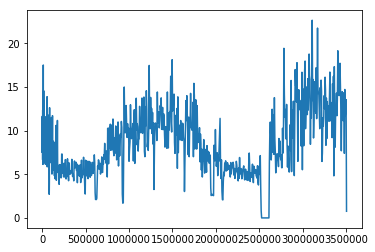

In [10]:
plt.plot(ts)

In [ ]:
## Test stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

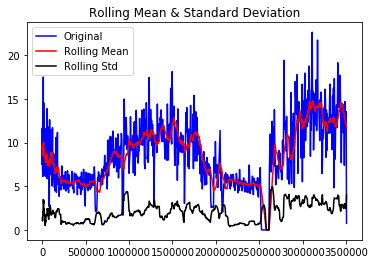

Results of Dickey-Fuller Test:
Test Statistic                  -1.794848
p-value                          0.383023
#Lags Used                      20.000000
Number of Observations Used    793.000000
Critical Value (1%)             -3.438623
Critical Value (5%)             -2.865192
Critical Value (10%)            -2.568714
dtype: float64


In [16]:
test_stationarity(ts)

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


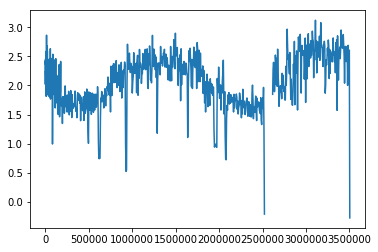

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log)

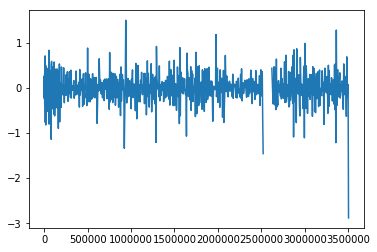

In [18]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
ts_log_diff = ts_log_diff.fillna(0)
ts_log = ts_log.fillna(0)

In [35]:
ts_log[ts_log < 0] = 0

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: nan')

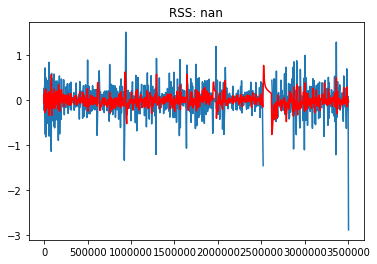

In [37]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


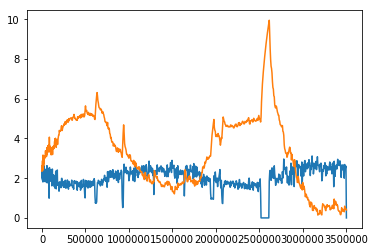

In [38]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

doesnt look correct, prediction seems to be inversely correlated, TODO, check this

Text(0.5,1,'RMSE: 1453.3775')

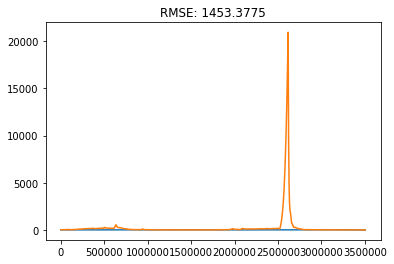

In [39]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))